In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/perth-house-prices/all_perth_310121.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
import warnings
import joblib

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/perth-house-prices/all_perth_310121.csv')
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


# Data Exploration

#### With data exploration we can take information about missing values, each column's datatype and deeper understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [6]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [7]:
correlation_rate=df.corr(numeric_only=True).abs()
correlation_rate.style.background_gradient('coolwarm')

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
PRICE,1.000000,0.252637,0.377133,0.134343,0.056855,0.548497,0.157218,0.354327,0.095089,0.171553,0.053041,0.183734,0.021941,0.461991
BEDROOMS,0.252637,1.000000,0.555702,0.194197,0.051223,0.536926,0.229019,0.124654,0.102203,0.010601,0.021967,0.015170,0.092391,0.024461
BATHROOMS,0.377133,0.555702,1.000000,0.186801,0.027059,0.555843,0.339594,0.033053,0.037068,0.041374,0.051411,0.093817,0.060734,0.096024
GARAGE,0.134343,0.194197,0.186801,1.000000,0.059211,0.201541,0.040371,0.046244,0.110527,0.028005,0.016416,0.091270,0.099654,0.021863
LAND_AREA,0.056855,0.051223,0.027059,0.059211,1.000000,0.073836,0.002063,0.133262,0.233023,0.042070,0.014389,0.151255,0.286964,0.048758
FLOOR_AREA,0.548497,0.536926,0.555843,0.201541,0.073836,1.000000,0.226872,0.022687,0.106527,0.050658,0.043555,0.046625,0.120048,0.145502
BUILD_YEAR,0.157218,0.229019,0.339594,0.040371,0.002063,0.226872,1.000000,0.270110,0.103350,0.044095,0.045463,0.059047,0.108719,0.158639
CBD_DIST,0.354327,0.124654,0.033053,0.046244,0.133262,0.022687,0.270110,1.000000,0.446496,0.255801,0.196813,0.060097,0.377118,0.328703
NEAREST_STN_DIST,0.095089,0.102203,0.037068,0.110527,0.233023,0.106527,0.103350,0.446496,1.000000,0.204347,0.037174,0.496924,0.634712,0.189571
POSTCODE,0.171553,0.010601,0.041374,0.028005,0.042070,0.050658,0.044095,0.255801,0.204347,1.000000,0.642643,0.173918,0.128424,0.192768


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns=[col.title() for col in df.columns]
df.head()

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,Nearest_Stn,Nearest_Stn_Dist,Date_Sold,Postcode,Latitude,Longitude,Nearest_Sch,Nearest_Sch_Dist,Nearest_Sch_Rank
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


# Data Cleaning

In [10]:
df.Garage.fillna(np.round(df.Garage.mean()),inplace=True)
suburb_stn=df.groupby(['Suburb','Nearest_Stn']).Build_Year.mean()
suburb_stn=suburb_stn.dropna()
suburb_stn_null=df[df.Build_Year.isnull()].groupby(['Suburb','Nearest_Stn']).min().index.values
for ind in suburb_stn_null:
    if ind in suburb_stn.index :
        null_col=df[(df.Suburb==ind[0])&(df.Nearest_Stn==ind[1])]
        df[(df.Suburb==ind[0])&(df.Nearest_Stn==ind[1])]=null_col.fillna({'Build_Year':int(suburb_stn[ind])})

df.Build_Year=SimpleImputer(strategy='most_frequent').fit_transform(df[['Build_Year']])
df.drop('Nearest_Sch_Rank',axis=1,inplace=True)

# Feature Engineering

#### The target of feature engineering is to create and transform features (input variables) in a way that improves the performance of machine learning models.

* ####  There is a certain type of school near each house. So, I add  columns called School_type
* #### I add Govern_area column so that each government area included several suburbs
* #### Data_Sold column changed (Shown year only)
* #### Other columns are inserted depending on the number of columns available

In [11]:
school_types=['SENIOR HIGH SCHOOL','HIGH SCHOOL','SCHOOL','COLLEGE','CAMPUS',
              'ALTA-1','ACADEMY','GRAMMAR']
def replace_to_type(school_types,x):
    for school_type in school_types:
        if x.find(school_type)!=-1:           
            return school_type
govern_area=pd.read_html('https://en.wikipedia.org/wiki/List_of_Perth_suburbs')[1]
govern_area=govern_area.drop_duplicates(subset='Suburb')
def add_gov_area(suburb):
    return govern_area[govern_area.Suburb==suburb]['Local government area'].values[0]
df['School_type']=df[['Nearest_Sch']].applymap(lambda x:replace_to_type(school_types,x))

df['Date_Sold']=df[['Date_Sold']].applymap(lambda x:int(x[3:7]))
df['Govern_Area']=df[['Suburb']].applymap(lambda x: add_gov_area(x))
df['Remain_Area']=df['Land_Area']-df['Floor_Area']
df['Price_Per_Area']=df['Price']/df['Land_Area']
df['Home_Age']=2022-df['Build_Year'].astype(dtype=np.int64)
df['Rooms']=df['Bedrooms']+df['Bathrooms']+2

In [12]:
df.to_csv('perth_house_prepared.csv')
df.head()

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,...,Latitude,Longitude,Nearest_Sch,Nearest_Sch_Dist,School_type,Govern_Area,Remain_Area,Price_Per_Area,Home_Age,Rooms
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,SENIOR HIGH SCHOOL,Cockburn,440,941.666667,19,8
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,-32.193470,115.859554,ATWELL COLLEGE,5.524324,COLLEGE,Kwinana,212,1039.886040,9,7
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,SENIOR HIGH SCHOOL,Armadale,633,399.165508,43,6
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,SENIOR HIGH SCHOOL,Mundaring,592,391.705069,69,5
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,-31.885790,115.947780,KIARA COLLEGE,1.514922,COLLEGE,Swan,335,697.424893,24,7


# Data Visualisation

#### The target of data visualization is to represent data graphically in a way that facilitates understanding, interpretation, and communication of information.

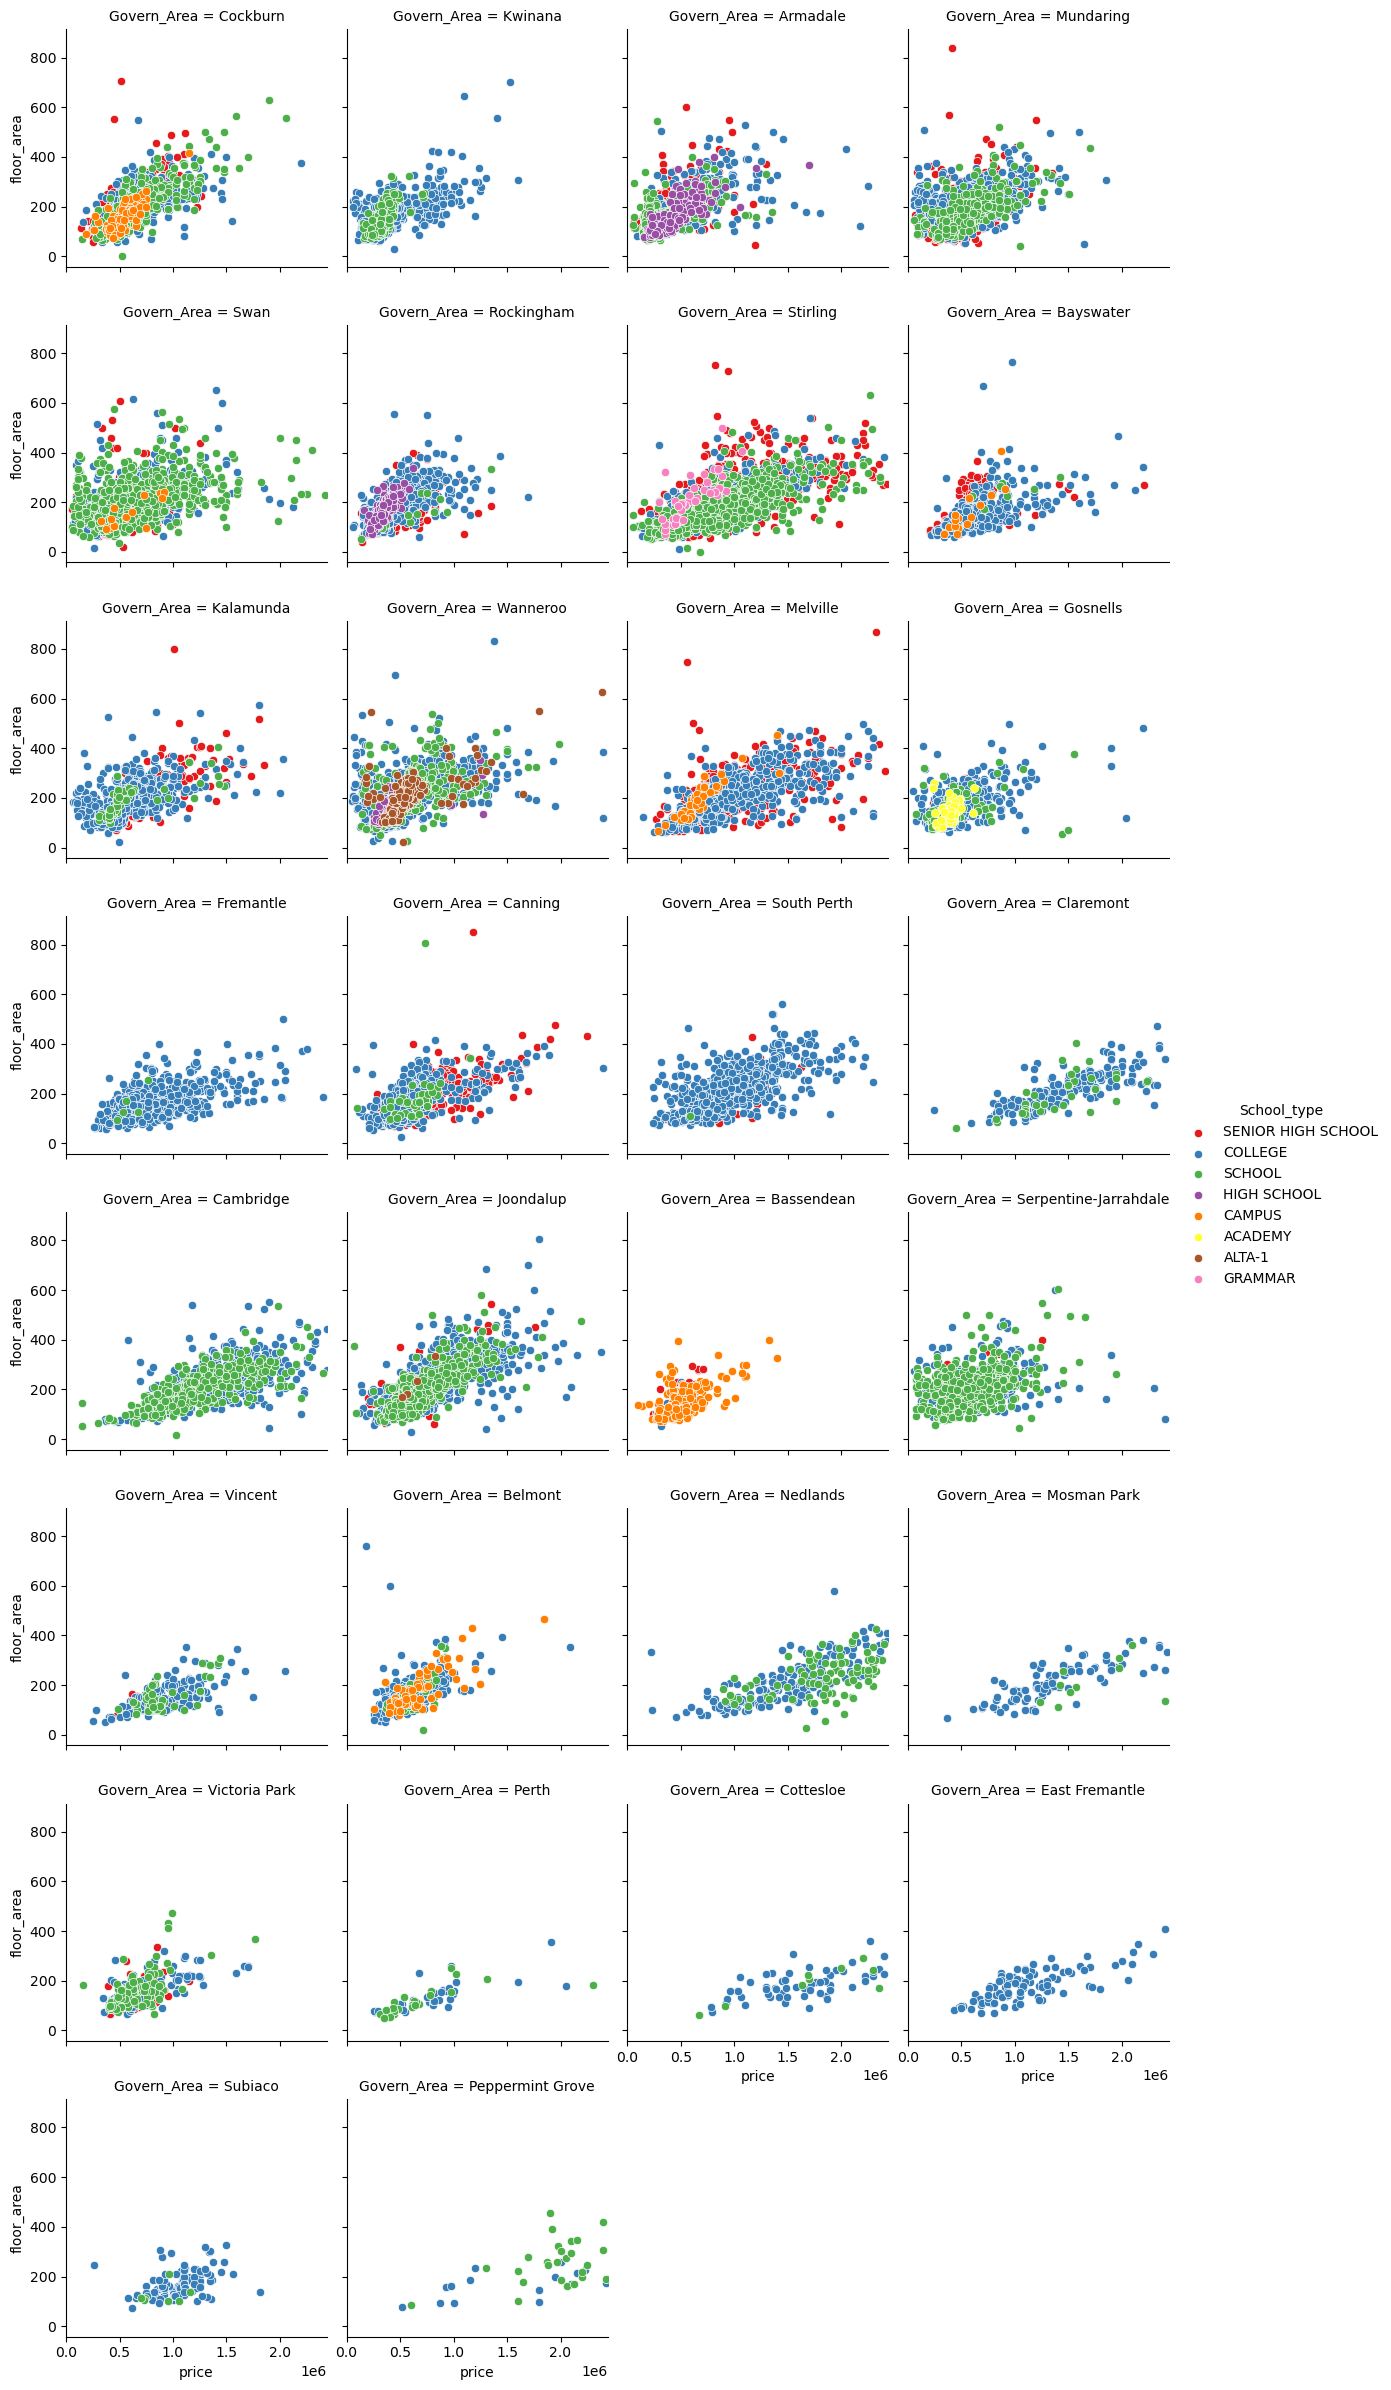

In [13]:
def make_facet(data,col_name,x_value,y_value,type_plot):    
    facet=sns.FacetGrid(data=data,col=col_name,hue='School_type',aspect=1,palette='Set1',col_wrap=4)
    facet.map(type_plot,x_value,y_value)
    facet.set(xlim=[0,df[x_value].max()])
    facet.add_legend(label_order=data['School_type'].unique().tolist())
    facet.set_xlabels('price')
    facet.set_ylabels('floor_area')
warnings.filterwarnings('ignore','The figure layout has changed to tight')
govern_area=df.Govern_Area.value_counts()
govern_area_vals=govern_area[govern_area>1000].index.values
#df1=df[df.Govern_Area.isin(govern_area_vals)]
make_facet(df,'Govern_Area','Price','Floor_Area',sns.scatterplot) 

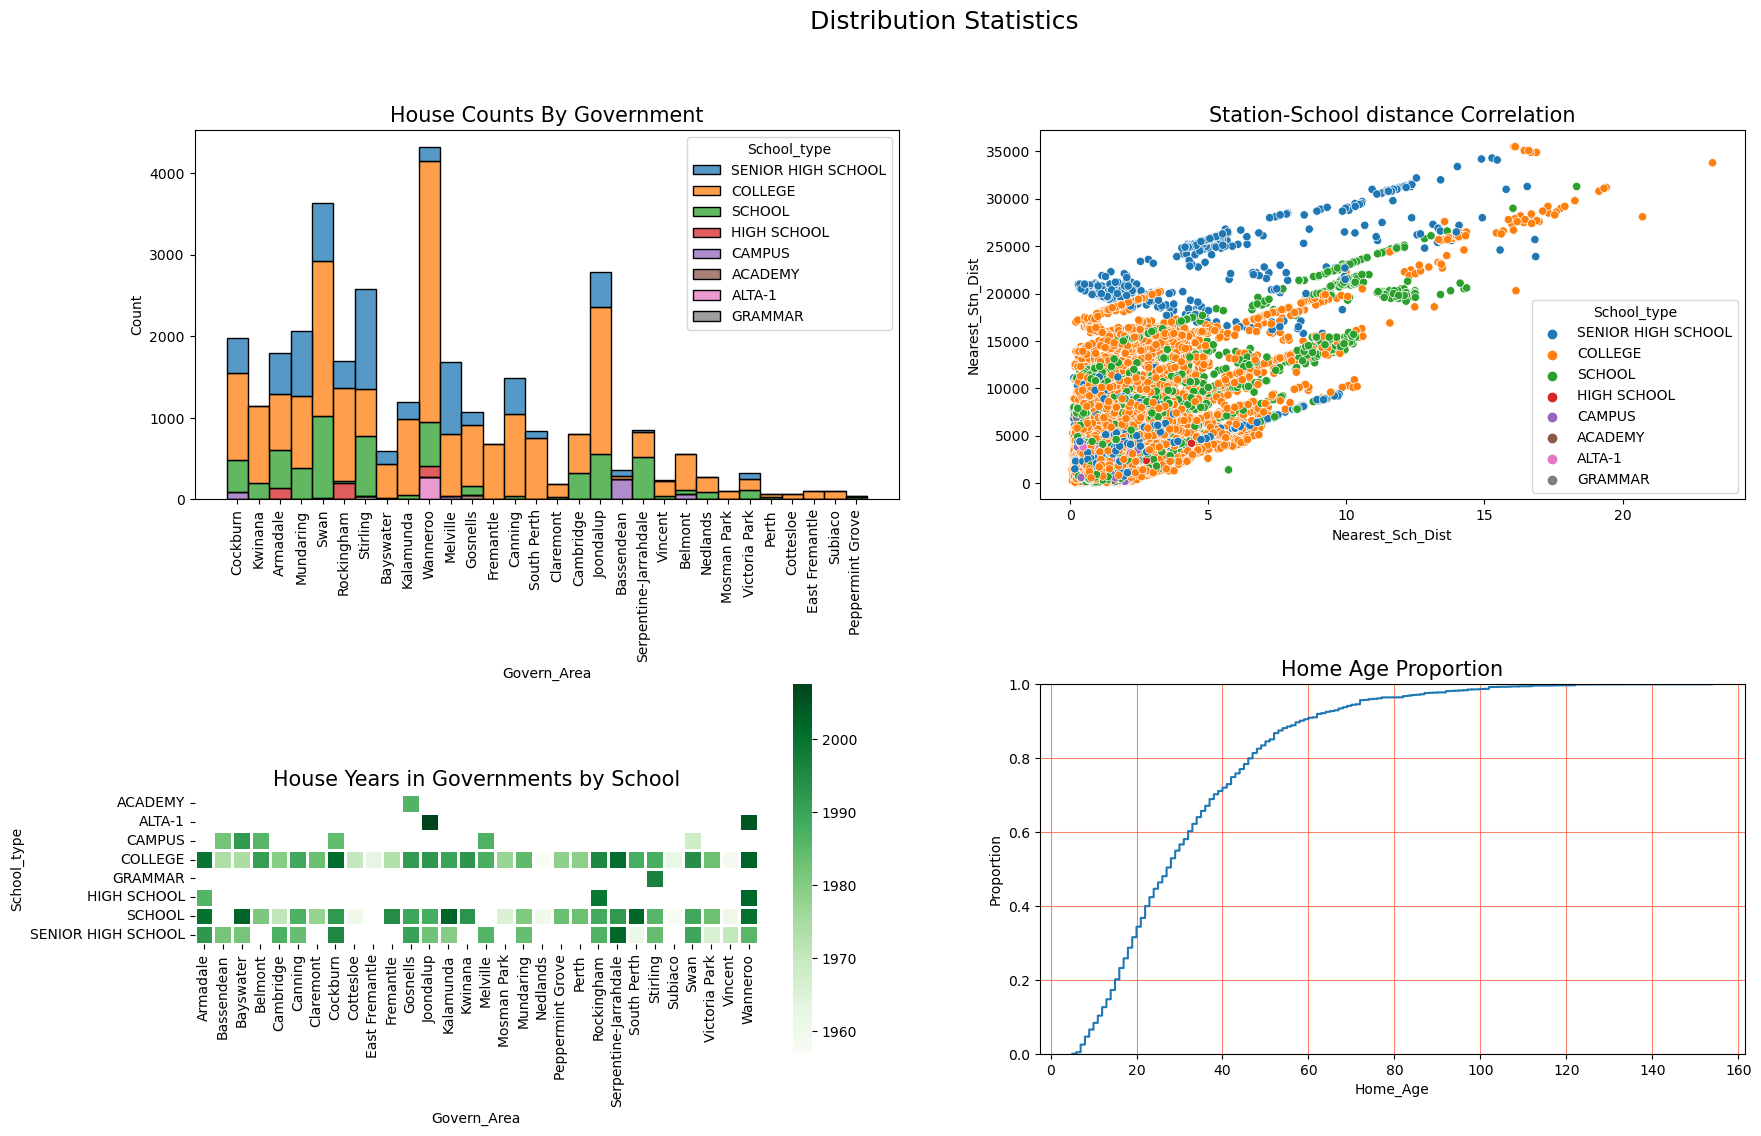

In [14]:
fig,ax=plt.subplots(2,2,figsize=(20,12))
fig.suptitle('Distribution Statistics',fontsize=18)
fig.subplots_adjust(hspace=0.5)
sns.histplot(ax=ax[0,0],data=df,x='Govern_Area',hue='School_type',multiple='stack')
warnings.filterwarnings('ignore','FixedFormatter should only be used together with FixedLocator')
ax[0,0].set_xticklabels(df.Govern_Area.unique(),rotation=90)
sns.scatterplot(ax=ax[0,1],data=df,x='Nearest_Sch_Dist',y='Nearest_Stn_Dist',hue='School_type')
df_heatmap=df.groupby(['School_type','Govern_Area']).Build_Year.mean().unstack(level=1)
sns.heatmap(ax=ax[1,0],data=df_heatmap,square=True,linewidth=1,cmap='Greens')
sns.ecdfplot(ax=ax[1,1],data=df,x='Home_Age')
ax[1,1].grid(color='tomato',alpha=0.8)

ax[0,0].set_title('House Counts By Government',fontsize=15)
ax[0,1].set_title('Station-School distance Correlation',fontsize=15)
ax[1,0].set_title('House Years in Governments by School',fontsize=15)
ax[1,1].set_title('Home Age Proportion',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Perth House Map')

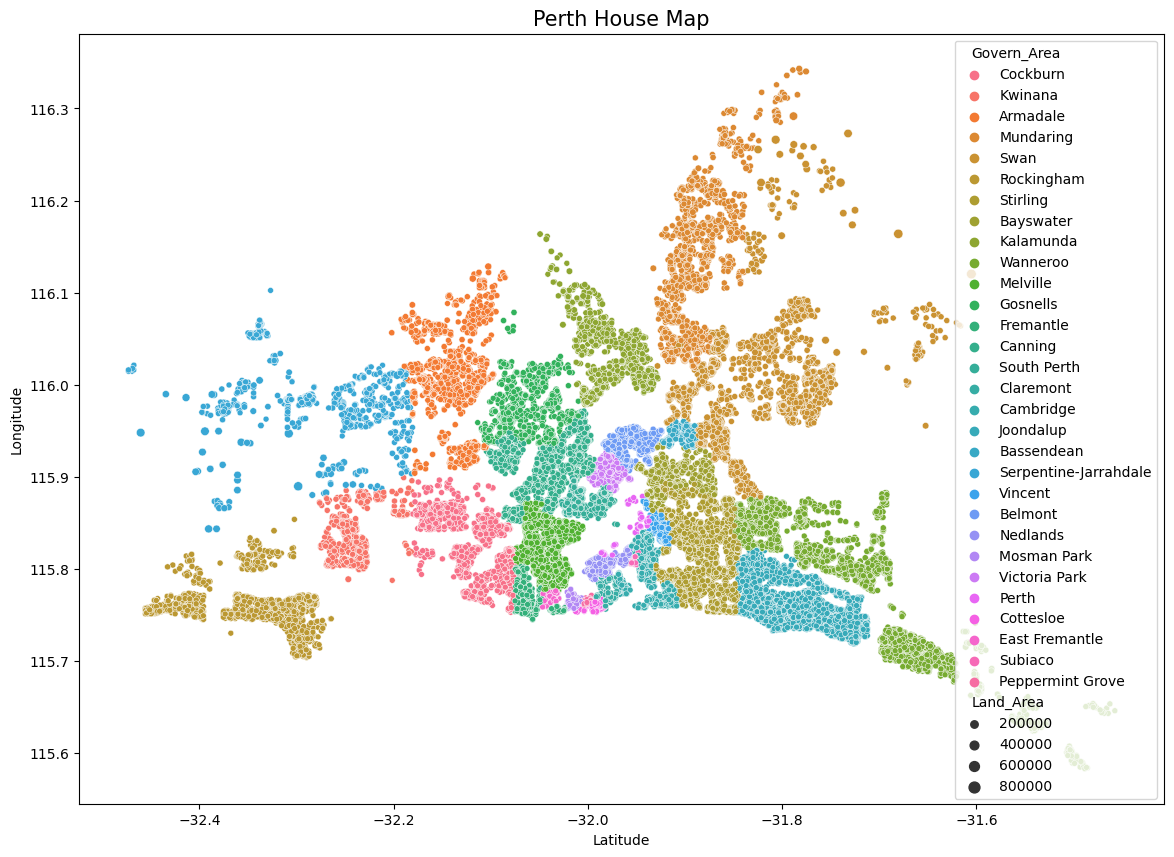

In [15]:
#plt.scatter(df['Latitude'],df['Longitude'],
           #marker='o',c=df['Price']/10000)
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x='Latitude',y='Longitude',hue='Govern_Area',
                size=df['Land_Area'],legend='brief')
plt.title('Perth House Map',fontsize=15)

In [16]:
df.head()

,Address,Suburb,Price,Bedrooms,Bathrooms,Garage,Land_Area,Floor_Area,Build_Year,Cbd_Dist,...,Latitude,Longitude,Nearest_Sch,Nearest_Sch_Dist,School_type,Govern_Area,Remain_Area,Price_Per_Area,Home_Age,Rooms
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,SENIOR HIGH SCHOOL,Cockburn,440,941.666667,19,8
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,-32.193470,115.859554,ATWELL COLLEGE,5.524324,COLLEGE,Kwinana,212,1039.886040,9,7
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,SENIOR HIGH SCHOOL,Armadale,633,399.165508,43,6
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,SENIOR HIGH SCHOOL,Mundaring,592,391.705069,69,5
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,-31.885790,115.947780,KIARA COLLEGE,1.514922,COLLEGE,Swan,335,697.424893,24,7


# Data Preparation for ML

In [33]:
df.School_type.value_counts() #Suburb,Nearest_Stn,Nearest_Sch,School_type,Govern_Area
X=df.drop(['Address','Postcode','Price'],axis=1)
X['School_type']=LabelEncoder().fit_transform(X[['School_type']])
y=df['Price'].values
cat_cols=[col for col in X.columns if X[col].dtype=='object' and col!='School_type']
num_cols=[col for col in X.columns if X[col].dtype!='object']
num_pipe=Pipeline([('standard',StandardScaler())])
full_pipe=ColumnTransformer([('ordinal_encoding',OrdinalEncoder(),cat_cols),
                             ('one_hot_encoding',OneHotEncoder(handle_unknown='ignore'),['School_type']),
                             ('num_pipeline',num_pipe,num_cols)
                             
])
X_prepared=full_pipe.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
full_pipe.fit(X)
pipe_filename='pipeline.jbl'
joblib.dump(full_pipe,pipe_filename)
X.to_csv('data_X.csv')

In [19]:
train_X,test_X,train_y,test_y=train_test_split(X_prepared,y,test_size=0.2,random_state=23)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((26924, 29), (6732, 29), (26924,), (6732,))

# Machine Learning

#### Below, I create class to take results from some regression algorithms

In [20]:
class Model_evol():
    def __init__(self,model,train_x=train_X,test_x=test_X,train_y=train_y,test_y=test_y):
        self.model=model
        self.train_X=train_x
        self.test_X=test_x
        self.train_y=train_y
        self.test_y=test_y
    def model_prediction(self):
        self.model.fit(self.train_X,self.train_y)
        predicted=self.model.predict(self.test_X)
        return predicted
    def r2_error(self):
        predict=self.model_prediction()
        r2=r2_score(self.test_y,predict)*100
        return r2
    def root_mean_squared_error(self):
        predict=self.model_prediction()
        rmse=np.sqrt(mean_squared_error(self.test_y,predict))
        return rmse
    def mean_absolute_error(self):
        predict=self.model_prediction()
        mae=mean_absolute_error(self.test_y,predict)
        return mae
    def all_evol(self):
        return [self.r2_error(),self.root_mean_squared_error(),self.mean_absolute_error()]

In [21]:
warnings.filterwarnings('ignore','Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation')
models_result={'Linear':Model_evol(LinearRegression(n_jobs=4)).all_evol(),
               'Lasso':Model_evol(Lasso(max_iter=1000)).all_evol(),
               'Ridge':Model_evol(Ridge()).all_evol(),
               'ElasticNet':Model_evol(ElasticNet(l1_ratio=0.8)).all_evol(),
               'RandomForest':Model_evol(RandomForestRegressor(n_estimators=10)).all_evol(),
               'DecisionTree':Model_evol(DecisionTreeRegressor()).all_evol(),
               'Xgboost':Model_evol(XGBRegressor()).all_evol(),
              }
models_result

{'Linear': [67.19320416309267, 205382.91185504582, 138065.28270414003],
 'Lasso': [67.19295890143145, 205383.67956884895, 138064.64833283538],
 'Ridge': [67.19247915565822, 205385.18125246098, 138064.39702026595],
 'ElasticNet': [65.58258245587803, 210364.0576517005, 141280.3869034239],
 'RandomForest': [98.72164786508624, 41207.396204961944, 13214.081847890671],
 'DecisionTree': [97.98911144740465, 51308.37199923009, 19809.511437908495],
 'Xgboost': [99.08190343650935, 34357.89750553157, 19341.138173439358]}

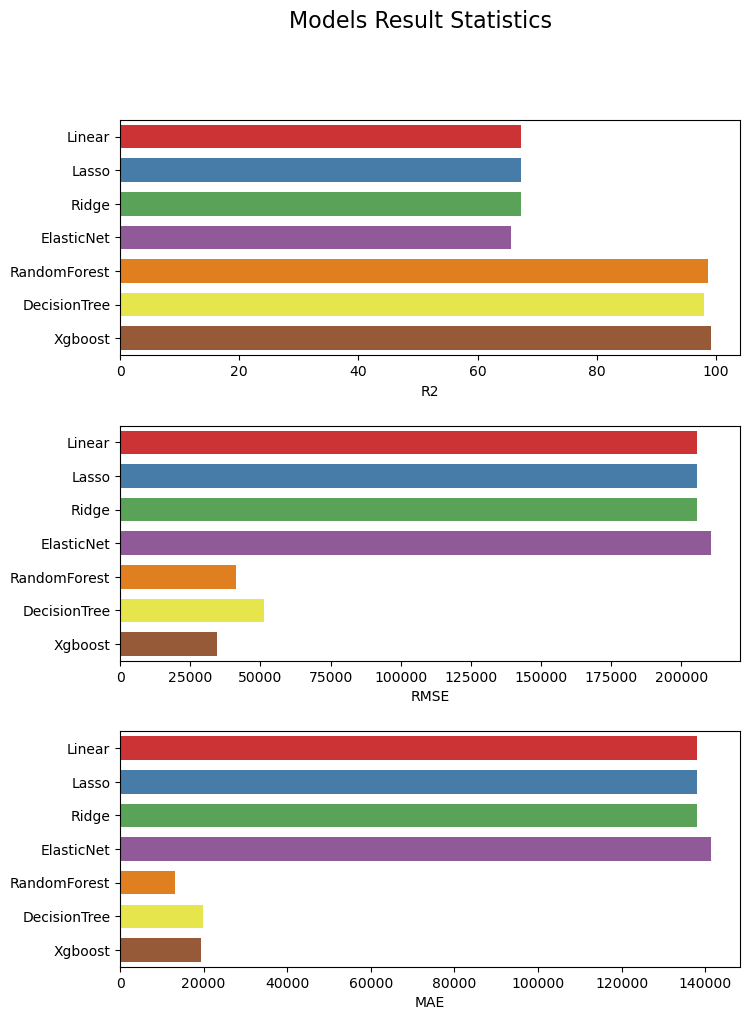

In [22]:
results_df=pd.DataFrame(models_result,index=['R2','RMSE','MAE']).T
fig,ax=plt.subplots(3,1,figsize=(8,11))
plt.suptitle('Models Result Statistics',fontsize=16)
plt.subplots_adjust(hspace=0.3)
sns.barplot(data=results_df,x='R2',y=results_df.index,palette='Set1',ax=ax[0],width=0.7)
sns.barplot(data=results_df,x='RMSE',y=results_df.index,palette='Set1',ax=ax[1],width=0.7)
sns.barplot(data=results_df,x='MAE',y=results_df.index,palette='Set1',ax=ax[2],width=0.7)
plt.show()

#### As you can see, linear models showed so bad result compared with other three models (XGB,Random Forest,Decision Tree).So, I perform fine tuning for XGB (it works very well)

In [23]:
#warnings.filterwarnings('ignore','A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy ')
xgb1 = XGBRegressor()
parameters_xgb = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
def grid_search(model,parameters,cv=5,verbose=True):   
    grid = GridSearchCV(xgb1,parameters,cv = 2,n_jobs = 5,verbose=True)
    grid.fit(train_X,train_y)
    return grid.best_params_
xgb_best_params=grid_search(XGBRegressor(),parameters_xgb)
print(f"XGB best params: {xgb_best_params}\n")

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[04:51:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
XGB best params: {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}



In [24]:
XGB=XGBRegressor(colsample_bytree=0.7,learning_rate=0.07,max_depth=5,
                min_child_weight=4,n_estimators=500,nthread=4,subsample=0.7)
kfold=KFold(n_splits=5,shuffle=True,random_state=23)
cv_scores_rf = cross_val_score(RandomForestRegressor(n_estimators=10),X_prepared,y,cv=kfold,scoring='r2')
cv_scores_xgb = cross_val_score(XGB,X_prepared,y,cv=kfold,scoring='r2')
cv_scores_tree= cross_val_score(DecisionTreeRegressor(),X_prepared,y,cv=kfold,scoring='r2')
print(f"Random Forest scores: {cv_scores_rf}")
print(f"XGB scores: {cv_scores_rf}")
print(f"Decision Tree scores: {cv_scores_rf}")

Random Forest scores: [0.98807255 0.98765197 0.98314804 0.98672672 0.9800586 ]
XGB scores: [0.98807255 0.98765197 0.98314804 0.98672672 0.9800586 ]
Decision Tree scores: [0.98807255 0.98765197 0.98314804 0.98672672 0.9800586 ]


In [25]:
RF=RandomForestRegressor(n_estimators=10,random_state=23)
Tree=DecisionTreeRegressor(random_state=23)
final_models_result={'RandomForest':Model_evol(RF).all_evol(),
               'DecisionTree':Model_evol(Tree).all_evol(),
               'Xgboost':Model_evol(XGB).all_evol()}
final_results=pd.DataFrame(final_models_result,index=['R2','RMSE','MAE']).T
final_results

,R2,RMSE,MAE
RandomForest,98.678416,41222.072712,13389.062493
DecisionTree,97.657280,54883.605278,19924.357398
Xgboost,99.270323,30630.057575,16460.260258


# Conclusion

#### Finally, three models chosen as a model that returns good results.Because of having some categorical data thse models perform well.(It is just my opinion)

In [26]:
with open('RF_model.jbl','wb') as file:
    joblib.dump(RF,file)
with open('XGB_model.jbl','wb') as file:
    joblib.dump(XGB,file)
with open('Tree_model.jbl','wb') as file:
    joblib.dump(Tree,file)

In [27]:
def model_predict(model,file_name,data=X_prepared):
    model.fit(train_X,train_y)
    pred=model.predict(data)
    df_pred=pd.DataFrame(pred)
    df_pred.to_csv(file_name)
RF_predict=model_predict(RF,'RF_prediction.csv')
XGB_predict=model_predict(XGB,'XGB_prediction.csv')
Tree_predict=model_predict(Tree,'Tree_prediction.csv')